# CS2006 Python Practical 2

# 0. Import the Required Libraries

In [35]:
import pandas as pd

In [36]:
import numpy as np

In [37]:
import matplotlib.pyplot as plt

In [38]:
import json

In [39]:
import networkx as nx

In [40]:
from wordcloud import WordCloud as wc

In [41]:
from collections import Counter

In [42]:
import folium

In [43]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display

In [44]:
df=pd.read_csv("CometLanding.csv")

### Check the Initial Length of the CSV File

In [45]:
len(df)

77319

### Check the Data Type of Each Column

In [46]:
df.dtypes

id_str                       float64
from_user                     object
text                          object
created_at                    object
time                          object
geo_coordinates               object
user_lang                     object
in_reply_to_user_id_str      float64
in_reply_to_screen_name       object
from_user_id_str             float64
in_reply_to_status_id_str    float64
source                        object
profile_image_url             object
user_followers_count         float64
user_friends_count           float64
status_url                    object
entities_str                  object
dtype: object

## 1. Refine the Dataset

### 1) Check Data File for Duplicated Tweets and Remove Duplicates

In [47]:
df.drop_duplicates(['id_str'], inplace = True)

In [48]:
len(df)

77268

### 2) Remove Text That is Null

In [49]:
df = df[df['text'].notnull()]

In [50]:
len(df)

77267

## 2. Perform the Descriptive Analysis of the Dataset

### 1.1) Calculate the Total Number of Tweets

In [51]:
numTweets = len(df[(df['in_reply_to_user_id_str'].notnull() == False) #Filters out replies
                   & (df['text'].str.startswith('RT', na=False) == False)]) #Filters out retweets

In [52]:
print("Total number of tweets (excluding replies and retweets): " 
      + str(numTweets)) #Filters out retweets

Total number of tweets (excluding replies and retweets): 15582


### 1.2) Calculate the Total Number of Retweets

In [53]:
dfRT = df[df.text.str.startswith('RT', na=False)]

In [54]:
numRT = len(dfRT)

In [55]:
print("Total number of retweets: " + str(numRT))

Total number of retweets: 59998


### 1.3) Calculate the Total Number of Replies

In [56]:
dfReplies = df[df['in_reply_to_user_id_str'].notnull()]

In [57]:
numReplies = len(dfReplies)

In [58]:
print("Number of replies: " + str(numReplies))

Number of replies: 1723


### 2) Calculate the Total Number of Different Users Tweeting in this DataSet

In [59]:
numUsers = len(df['from_user'].unique())

In [60]:
print("The number of users: " + str(numUsers))

The number of users: 50195


### 3.1) Calculate the Average Number of Tweets by a User

In [61]:
print("Average number of tweets: ", str(numTweets / numUsers))


Average number of tweets:  0.31042932563004283


### 3.2) Calculate the Average Number of Retweets by a User

In [62]:
print("Average number of retweets: ", str(numRT / numUsers))

Average number of retweets:  1.195298336487698


### 3.3) Calculate the Average Number of Replies Sent by a User

In [63]:
print("Average number of replies: ", str(numReplies / numUsers))

Average number of replies:  0.03432612810040841


### 4) Identify the Most Popular Hashtags

In [64]:
hashtags_list = df.text.str.findall(r'#.*?(?=\s|$)') #Gets all text starting with a hash #https://stackoverflow.com/questions/45874879/extract-hashtags-from-columns-of-a-pandas-dataframe
hashtags = hashtags_list.tolist() #Converts data to list format
hashtags = [item for sublist in hashtags for item in sublist] #Flattens list of lists to list. # https://stackoverflow.com/questions/952914/making-a-flat-list-out-of-list-of-lists-in-python
count = Counter(hashtags) #Gets the counts for each hashtag
count.most_common() #Gets the list in order of most popular
for hashtag in count.most_common(): #Prints hashtags
    print(hashtag[0], hashtag[1])

#CometLanding 53441
#cometlanding 10486
#67P 5872
#Rosetta 4978
#Philae 2613
#CometLanding: 1745
#Cometlanding 1004
#CometLanding. 981
#WishKoSaPasko 970
#HappyBirthdaySandaraPark 965
#67P/CG 701
#esa 676
#rosetta 675
#SEP 623
#philae 588
#PoseToiPhilae 535
#Comâ€¦ 514
#CometLanding, 462
#space 443
#comâ€¦ 422
#cometlanding, 413
#CometLâ€¦ 408
#67P. 406
#rosettamission 404
#ESA 396
#comet 346
#CometLanâ€¦ 342
#cometlanding. 323
#cometlaâ€¦ 323
#CometLanding! 257
#Philae2014 254
#Câ€¦ 251
#â€¦ 239
#ISS 231
#COMETLANDING 230
#AOS 223
#RejectedMuppets 218
#HomeToMama 206
#Cometâ€¦ 205
#67P, 194
#CometLanding? 190
#CometLandingâ€ 190
#Comeâ€¦ 189
#science 182
#CometLanding" 153
#BreakTheInternet 147
#DoctorWho 146
#TimoGH15 146
#xkcd 145
#câ€¦ 143
#Rosetta's 142
#Rosetta, 142
#GUERRIERO 142
#spaceveg 138
#Agilkia 133
#CometLaâ€¦ 131
#67P! 127
#67P: 124
#autoinculpacions9N 120
#CometWatch 119
#trndnl 118
#cometlanding! 113
#CometLandiâ€¦ 109
#CometLandâ€¦ 109
#cometlanding: 108
#ESA_Rosett

#Telespazio 2
#CometLandingsongs 2
#ukhousing 2
#Reminder 2
#estec 2
#noordwijk 2
#spaceâ€¦ 2
#np 2
#firstworldproblems 2
#Einschaltbefehl: 2
#CMC 2
#SkyatNight 2
#apod 2
#Comics 2
#Rosetta-Kontrollraum: 2
#ESA-Ingenieur 2
#armageddon 2
#comete 2
#tecnologÃ­a 2
#ansioso 2
#Horyou 2
#Come... 2
#Science. 2
#buddy 2
#cometlandingsongs 2
#xmas 2
#Alwaystherightanswer 2
#CometLanding?Ni 2
#groundbreaking 2
#Ros... 2
#TheMachinepelicula?En 2
#Chury 2
#AppStore 2
#comet's 2
#TyoNews 2
#SaPagsapitNgPasko 2
#Telescopes 2
#Comets, 2
#1: 2
#rosina 2
#Budapest, 2
#Hungary 2
#Spain 2
#sensawunda 2
#TimoGH15. 2
#Rosetta.A 2
#postoffice! 2
#meta 2
#sciencemag 2
#BDMELODI_73 2
#RosettaSpacecraft's 2
#EuropeanSpaceAgency... 2
#phila 2
#GoodLuckPhilae 2
#knoâ€¦ 2
#now 2
#AlexTweetup 2
#Rome, 2
#Italy. 2
#scienza 2
#divulgazione 2
#wachten 2
#spn200 2
#LastTweet 2
#Churycito 2
#rock 2
#rule 2
#semanasciencia 2
#KometLandingen 2
#EchteLiebe 2
#CometFranticGrabbing. 2
#London, 2
#England. 2
#Philae-Lander:

#BlownAway 1
#Technology 1
#researchfish! 1
#F... 1
#Dehavilland 1
#science!!! 1
#HiN 1
#SpaceLaboratory 1
#AusGruenden; 1
#RandallMunroe 1
#rumrejse2014 1
#Foâ€¦ 1
#Ireland!ðŸ€ 1
#tvshow 1
#Cometlanâ€¦ 1
#fingâ€¦ 1
#Comet? 1
#sheeple. 1
#want 1
#hd 1
#Cometlandinâ€¦ 1
#geek.. 1
#hrpr 1
#BabyLanding 1
#CometLanding#CometLanding 1
#ESAâ€™s 1
#TagThis... 1
#LucasScott, 1
#Stardust 1
#CMC_T1 1
#furry 1
#kayne 1
#i20 1
#Hyundai 1
#APOCALIPSISMINECRAFT3 1
#esa" 1
#Reminder: 1
#QUIZ 1
#Cometlanding.If 1
#CometShirtGate 1
#weetje 1
#Weltraumromantik 1
#SpaceHumor] 1
#getoffthisrock 1
#AsteroidDeflection? 1
#AOâ€¦ 1
#CometHollywood 1
#RosettaRocks 1
#CHESTBUMP 1
#kapottestuwmotor 1
#Nachtschicht 1
#comelanding 1
#Interâ€¦ 1
#rosettamissionâ€¦ 1
#tchury. 1
#Rosario 1
#armagedon 1
#DirectAN 1
#cometlanding"Sending 1
#FastingBloodDraw 1
#Rosetta-Mission. 1
#morningjoe 1
#musicaluniverse 1
#cometlanding) 1
#London. 1
#fascinating 1
#broadcasting 1
#essaydeadline, 1
#party, 1
#onedaytoomanyhashtag

## 3. Build plots/visualisations

### 3.1) The structure of the dataset

In [65]:
structure_names = ["Tweets", "Retweets", "Replies"]

In [66]:
structure_data = [numTweets, numRT, numReplies]

In [67]:
plt.bar(structure_names, structure_data, align="center")
plt.ylabel('Amount')
plt.title('Amount of Tweet Types')
plt.show()

TypeError: unsupported operand type(s) for -: 'str' and 'float'

### 3.2) The timeline of the tweets activity

In [ ]:
df.date_time = [str(x) for x in df["time"]]
df.date_time = [x.split(" ")[0] for x in df["time"]]
df.date_time = pd.to_datetime(df.date_time, dayfirst=True)

In [ ]:
plt.rcParams["figure.figsize"] = [15, 6]
#values = df["time"].value_counts()
#values.index = pd.to_datetime(values.index)
#values = values.sort_index()
values = pd.DataFrame(df.date_time.value_counts().reset_index())
values.columns = ["date", "amount"]
values = values.sort_values(by="date")
plt.plot([str(x).split(" ")[0] for x in values.date], values.amount)
plt.yscale("log")
plt.title("Number of tweets by date")

#for i in values:
    #plt.annotate(values.amount[i], (values.date[i], values.amount[i])
plt.ylabel('Number of Tweets')
plt.xlabel('Date')
plt.show()

### 3.3) Word cloud for hashtags

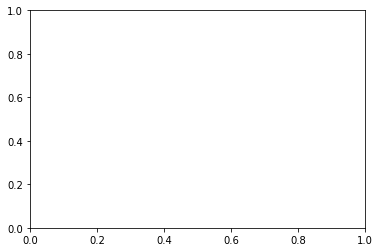

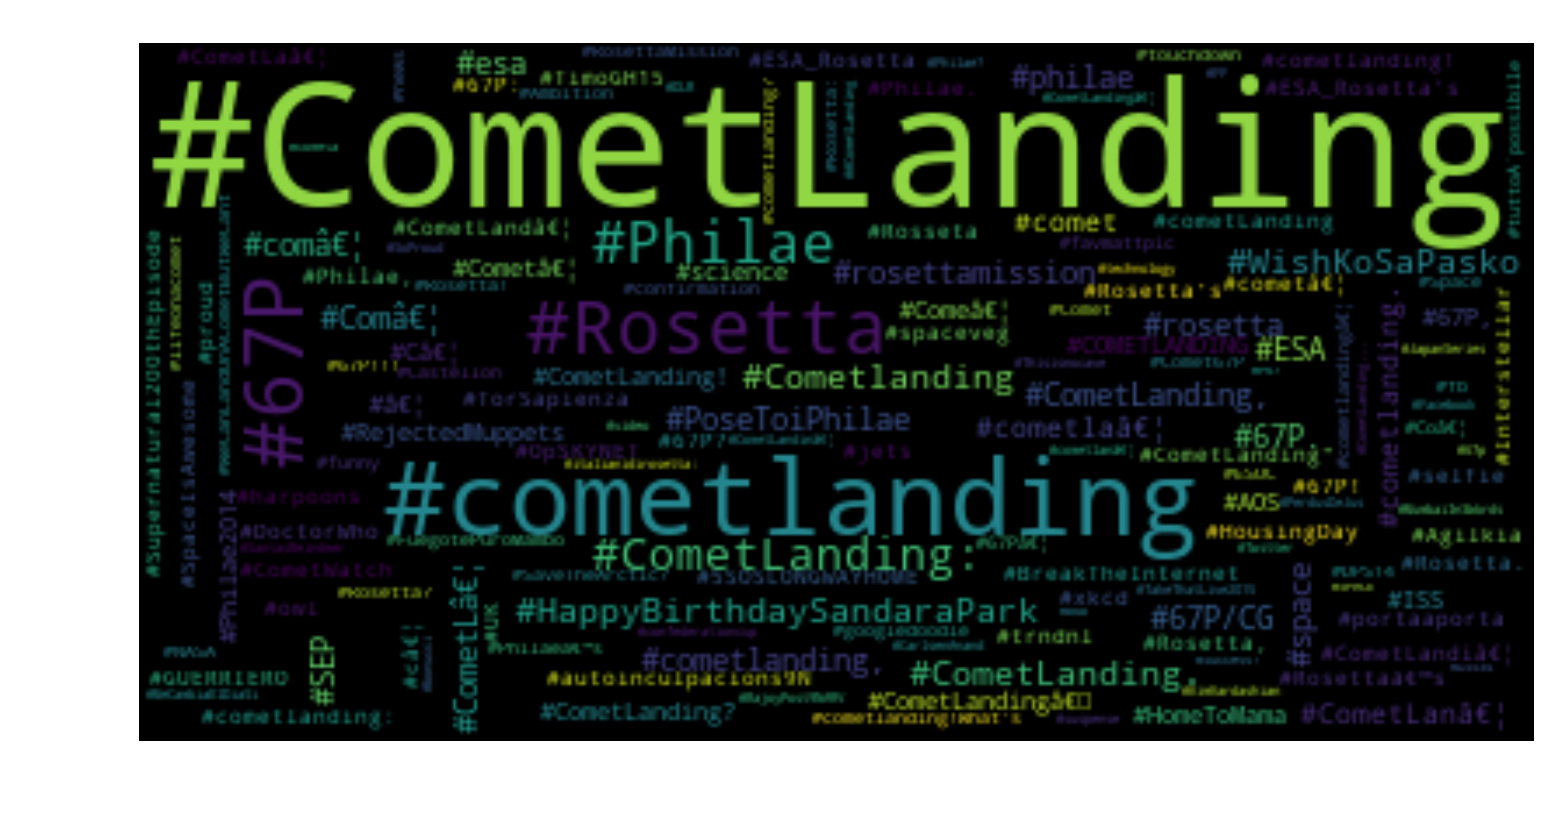

In [68]:
hashtagDictionary = dict(count)

wordcloud = wc(max_font_size=80).generate_from_frequencies(hashtagDictionary)
plt.figure(dpi=300)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Extensions

## Easy 1 - Analyse applications used to send tweets

In [69]:
app_list = df.source.str.findall(r'<a[^>]*>(.*)</a>') #https://stackoverflow.com/questions/36336228/python-regex-extract-text-within-html-tags
app_list = app_list.tolist()
i = 0
for item in app_list:
    if isinstance(item, list):
        app_list[i] = item[0]
    i+=1
apps = pd.Series(app_list).value_counts().reset_index()
print("Total number of unique applications: " + str(len(apps)))
print("10 most popular applications, number 5 will SHOCK you!")
apps.columns = ["Applications", "Number"]
for i in range(1, 10):
    print(str(i) + ". " + apps["Applications"][i] + " - " + str(apps["Number"][i]))

Total number of unique applications: 482
10 most popular applications, number 5 will SHOCK you!
1. Twitter for iPhone - 13743
2. Twitter for Android - 12770
3. TweetDeck - 4075
4. Twitter for iPad - 3282
5. dlvr.it - 1671
6. Twitter for Websites - 1462
7. Tweetbot for iÎŸS - 1055
8. Twitter for Windows Phone - 932
9. Tweet Old Post - 925


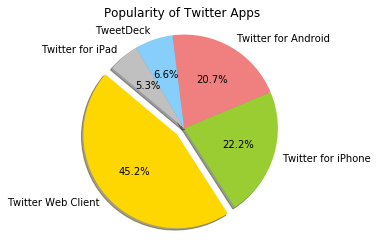

In [70]:
popular_apps = apps.iloc[0:5] #Get 5 most popular
popular_apps.columns = ["Applications", "Number"]

colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'silver']
explode = (0.1, 0, 0, 0, 0) 
 
plt.pie(popular_apps["Number"], explode=explode, labels=popular_apps["Applications"], colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.title("Popularity of Twitter Apps")
plt.show()

## Easy 2 - More descriptive analysis

### Average time each user was retweeted and replied

In [71]:
cd = df[["text", "from_user"]]
pd.options.mode.chained_assignment = None
cd.drop_duplicates(["text"], inplace = True) #Duplicate tweets don't count
cd.drop_duplicates(["from_user"], inplace = True) #Count the number of users
cd = cd["text"][np.logical_not (cd["text"].str.startswith('RT', na=False))] #Don't count retweets of retweets, since it should be attributed to the original user
num_unique_users = len(cd);
print("Number of users who made a unique tweet:", str(num_unique_users))

Number of users who made a unique tweet: 11603


In [72]:
numRTPerUser = numRT / num_unique_users
print("Avg. number of times each user was retweeted:", str(numRTPerUser))

Avg. number of times each user was retweeted: 5.170904076531931


In [73]:
numUserReplies = len(df[df['in_reply_to_user_id_str'].notnull()])
print("Number of times a user was replied: ", numUserReplies)

Number of times a user was replied:  1723


In [74]:
numRepliesPerUser = numUserReplies / numUsers
print("Avg. number of times each user was replied:", str(numRepliesPerUser))

Avg. number of times each user was replied: 0.03432612810040841


### Popular hours

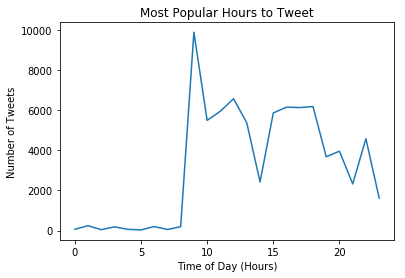

In [75]:
df["hour_time"] = [str(x) for x in df["time"]]
df["hour_time"] = [x.split(" ")[1].split(":")[0] for x in df["hour_time"]]
df["hour_time"] = pd.Series(item for item in df["hour_time"])

a = Counter(df["hour_time"])
hours = [keys for keys in a]
values = [a[str(hour)] for hour in hours]
pt = {"hours":hours, "values":values}
pt = pd.DataFrame(pt)
pt = pt.sort_values(by="hours")
pt = pt.iloc[0:24]
plt.ylabel("Number of Tweets")
plt.xlabel("Time of Day (Hours)")
plt.title('Most Popular Hours to Tweet')
plt.plot(pt["hours"], pt["values"])
plt.show()

## Medium - Analyse patterns of user activity over the period covered by the dataset

Text analysis: 

-Tweets/Retweets/Replies: From the previous data on tweets, retweets, and replies it is clear that a minority of users during this period produced actual tweets (and replies) where as the majority of users merely shared their posts in the form of retweets, perhaps indicating that influential users (such as those involved in the landing) were posting highly sharable content about the event. 

-Timeline of Tweets: The timeline of tweets graph also shows that there was a spike in the number of tweets around the beginning of the time period covered by the data set and that the number of tweets continued to fall as time progressed. This correlates with the date of the Philae landing (12/11/2014) at the beginning of the data set as well as the most popular hashtag '#CometLanding'. Presumably the slow decline in tweets during the period of this data set correlates with a fading interest in the event as time went on after the landing.

-Popularity of Twitter Apps: As demonstrated by the pie chart plotting the popularity of different twitter platforms, the Twitter web client came out far ahead of any other platform with a 45.2% share. This makes sense as the Twitter Web Client is viewable on all major desktop operating systems such as Windows, Mac OS, and Linux via various web browsers. Perhaps somewhat noteworthy is the fact that Twitter for iOS platforms (Twitter for iPhone and Twitter for iPad) make up the second largest share with a combined share of 27.5%. This may at first come as a surprise due to Android having a much larger worldwide share of the operating system market with 74.24% compared to the iOS share of 20.83% (March 2018)[1]. However when this data is adjusted by region (for the United States in this case), iOS has a 56.26% market share compared to Android's 43.24% (March 2018)[2]. As 72.3% of Twitter's users are based in United States (April 2018)[3] it explains the discrepency between the worldwide market share of different mobile platforms and those used by Twitter's users.

Sources:

[1] - http://gs.statcounter.com/os-market-share/mobile/worldwide - world mobile OS market share.
[2] - http://gs.statcounter.com/os-market-share/mobile/united-states-of-america - US mobile OS market share
[3] - https://www.statista.com/statistics/242606/number-of-active-twitter-users-in-selected-countries/ - active twitter users by country.

In [78]:
coordinate_df = df[(df.geo_coordinates.isnull() == False)]
coordinate_df = coordinate_df[(coordinate_df.geo_coordinates == "loc: 0,0") == False]
popups = []

for (x, y, z) in zip(coordinate_df['from_user'], coordinate_df['text'], coordinate_df['time']):
    popups.append(x)

coordinates = []
coordinates = coordinate_df.geo_coordinates.tolist() #Assigns coordinates to list
coordinates = [x.replace('loc: ', '') for x in coordinates] #Eliminates 'loc:' tag
coordinates = [tuple(float(y) for y in x.split(',')) for x in coordinates] #Converts string coords to tuple

map = folium.Map(location=[50, 0], zoom_start=2)
for point in range(0, len(coordinates)):
    folium.CircleMarker(coordinates[point], color='#049CCA', popup=popups[point],
                    fill_color='#049CCA', fill=True, fill_opacity=10, radius=2).add_to(map)
    
map

## Medium to Hard - Using networkx library to visualise the data

### 1) Analysis of User Connections through Replies

In [ ]:
initGraph = nx.Graph() # generate the initial graph instance

# Add all replies as edges and users as nodes
for index, tweet in dfReplies.iterrows():
    initGraph.add_node(tweet['from_user'])
    initGraph.add_edge(tweet['from_user'], tweet['in_reply_to_screen_name'])

In [ ]:
searchDepth = 3 # set the default depth of the search as 3

In [ ]:
# Draw Graph
pos = nx.spring_layout(initGraph)
nx.draw(initGraph, pos, node_color='k')
plt.title("Users' Reply Connections (Depth " + str(searchDepth) + ")")
plt.rcParams['figure.figsize'] = [30, 2] # set the default size of the output figure by using the variable called rcParams.
plt.show()

### 2) Analysis of User Connections through Mentions

In [ ]:
# Build the Relationship graph
mentionGraph = nx.Graph()
searchDepth = 1

### 3) Analysis of User Connections through Retweets

In [ ]:
retweetGraph = nx.Graph()
searchDepth = 2

In [ ]:
# Add all replies as edges and users as nodes
for index, tweet in dfRT.iterrows():
    retweetGraph.add_node(tweet['from_user'])
    textRT = tweet['text']
    textRT = textRT.split(" ")[1].replace(":", "").replace("@","")
    retweetGraph.add_edge(tweet['from_user'], textRT)

In [ ]:
# Draw Graph
pos = nx.spring_layout(retweetGraph)
nx.draw(retweetGraph, pos, node_color='b')
plt.title("User Reply Connections (Depth " + str(searchDepth) + ")")
plt.rcParams['figure.figsize'] = [105, 15]
plt.show()